In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows" , 50)
plt.style.use('ggplot')


In [3]:
train_og = pd.read_csv('train.csv' )
train_og

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_og = pd.read_csv('test.csv' )
test_og

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
numerical_train = train_og.select_dtypes(exclude='object')
numerical_test = test_og.select_dtypes(exclude='object')
numerical_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [6]:
categorical_train = train_og.select_dtypes(include='object')
categorical_test = test_og.select_dtypes(include='object')
categorical_train

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [7]:
numerical_train.isna().sum().sort_values(ascending=False)

Age            177
Survived         0
PassengerId      0
Pclass           0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [36]:
numerical_test.isna().sum().sort_values(ascending=False)

Age            86
Fare            1
Pclass          0
PassengerId     0
SibSp           0
Parch           0
dtype: int64

In [68]:
train_og.isna().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [69]:
test_og.isna().sum().sort_values(ascending=False)


Cabin          327
Age             86
Fare             1
Name             0
Pclass           0
PassengerId      0
Sex              0
Parch            0
SibSp            0
Ticket           0
Embarked         0
dtype: int64

In [41]:
numerical_test[numerical_test['Fare'].isnull()]

,PassengerId,Pclass,Age,SibSp,Parch,Fare
152,1044,3,60.5,0,0,NaN


In [59]:
test_og.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [77]:
train_og[train_og['Embarked'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [79]:


grouped_Pclass = train_og.groupby(['Pclass','Embarked', 'Sex'])['Age'].agg(['min', 'max', 'mean', 'median', 'std', 'count'])

grouped_Pclass

min   max       mean  median        std  count
Pclass Embarked Sex                                                     
1      C        female  16.00  60.0  36.052632   37.00  13.063147     38
                male    17.00  71.0  40.111111   36.50  15.298511     36
       Q        female  33.00  33.0  33.000000   33.00        NaN      1
                male    44.00  44.0  44.000000   44.00        NaN      1
       S        female   2.00  63.0  32.704545   33.00  13.848985     44
                male     0.92  80.0  41.897188   42.00  15.248284     64
2      C        female   3.00  28.0  19.142857   22.00   8.706866      7
                male     1.00  36.0  25.937500   29.50  10.870791      8
       Q        female  30.00  30.0  30.000000   30.00        NaN      1
                male    57.00  57.0  57.000000   57.00        NaN      1
       S        female   2.00  57.0  29.719697   29.00  12.968639     66
                male     0.67  70.0  30.875889   30.00  14.894849     90
3      C        female   0.75  45.0  14.062500   14.25  11.662797     16
                male     0.42  45.5  25.016800   26.00   9.738603     25
       Q        female  15.00  39.0  22.850000   20.00   8.171937     10
                male     2.00  70.5  28.142857   27.00  21.000392     14
       S        female   1.00  63.0  23.223684   23.00  12.963126     76
                male     1.00  74.0  26.574766   25.00  11.699646    214

In [ ]:
grouped_Pclass = numerical_train.groupby('Pclass')['Age'].agg(['min', 'max', 'mean', 'median', 'std', 'count'])
grouped_Pclass

,min,max,mean,median,std,count
Pclass,,,,,,
1,0.92,80.0,38.233441,37.0,14.802856,186
2,0.67,70.0,29.877630,29.0,14.001077,173
3,0.42,74.0,25.140620,24.0,12.495398,355


In [33]:
grouped_SibSp = numerical_train.groupby('SibSp')['Age'].agg(['min', 'max', 'mean', 'median', 'std', 'count'])
grouped_SibSp

,min,max,mean,median,std,count
SibSp,,,,,,
0,0.42,80.0,31.397558,29.0,13.647767,471
1,0.67,70.0,30.089727,30.0,14.645033,183
2,0.75,53.0,22.620000,23.0,14.679230,25
3,2.00,33.0,13.916667,9.5,11.317391,12
4,1.00,17.0,7.055556,6.5,4.880601,18
5,1.00,16.0,10.200000,11.0,5.805170,5
8,NaN,NaN,NaN,NaN,NaN,0


In [35]:
grouped = numerical_train.groupby(['Pclass', 'SibSp'])['Age'].agg(['min', 'max', 'mean', 'median', 'std', 'count'])
grouped

min   max       mean  median        std  count
Pclass SibSp                                                  
1      0       4.00  80.0  39.181416    37.0  14.844591    113
       1       0.92  70.0  37.414154    38.0  14.690355     65
       2      18.00  53.0  37.200000    44.0  16.513631      5
       3      19.00  24.0  22.000000    23.0   2.645751      3
2      0       0.83  70.0  31.934220    30.0  13.486824    109
       1       0.67  60.0  27.363636    29.0  14.609811     55
       2       1.00  32.0  19.125000    23.5  10.776131      8
       3      30.00  30.0  30.000000    30.0        NaN      1
3      0       0.42  74.0  27.630201    26.0  11.501377    249
       1       1.00  48.0  24.912698    25.0  11.439018     63
       2       0.75  41.0  18.875000    19.5  13.276560     12
       3       2.00  33.0   8.875000     6.0  10.260013      8
       4       1.00  17.0   7.055556     6.5   4.880601     18
       5       1.00  16.0  10.200000    11.0   5.805170      5
       8        NaN   NaN        NaN     NaN        NaN      0

In [31]:
missing_age = numerical_train[numerical_train['Age'].isnull()]
missing_age['Pclass'].value_counts()

Pclass
3    136
1     30
2     11
Name: count, dtype: int64

In [34]:
missing_age['SibSp'].value_counts()

SibSp
0    137
1     26
8      7
3      4
2      3
Name: count, dtype: int64

In [21]:
numerical_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [8]:
categorical_train.isna().sum().sort_values(ascending=False)

Cabin       687
Embarked      2
Name          0
Ticket        0
Sex           0
dtype: int64

# Numerical

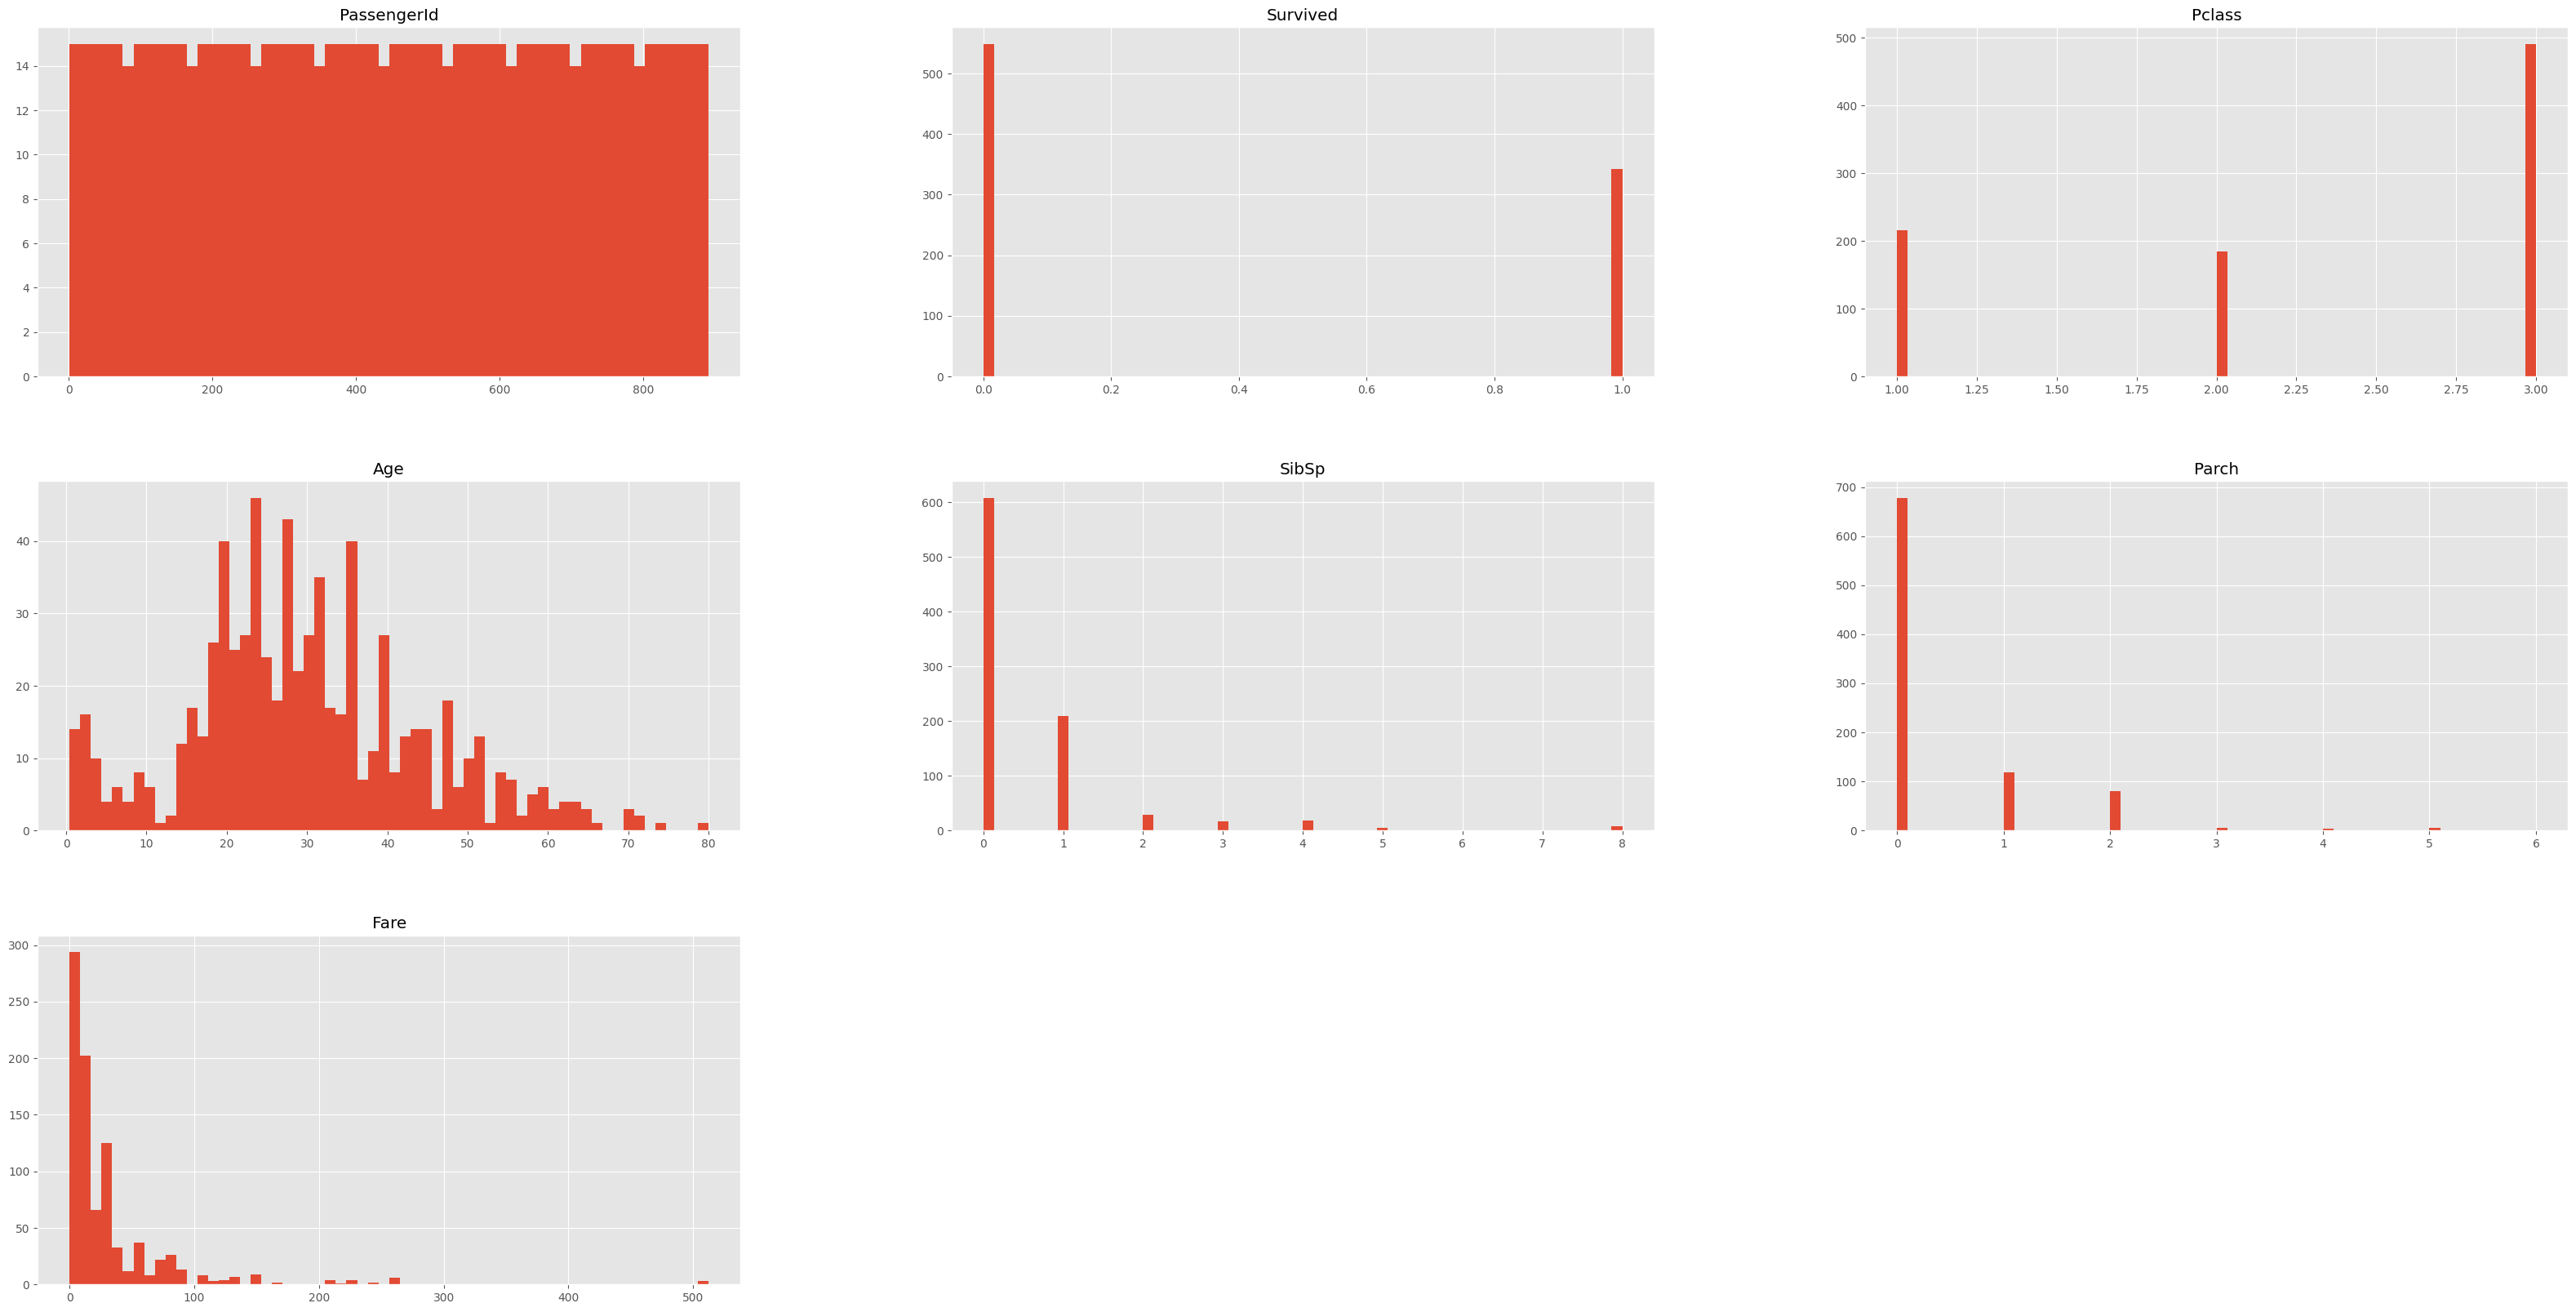

In [9]:
numerical_train.hist(bins = 60, figsize = (40,20))
plt.show()

In [14]:
numerical_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [16]:
numerical_train= numerical_train[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare' , 'Survived']]

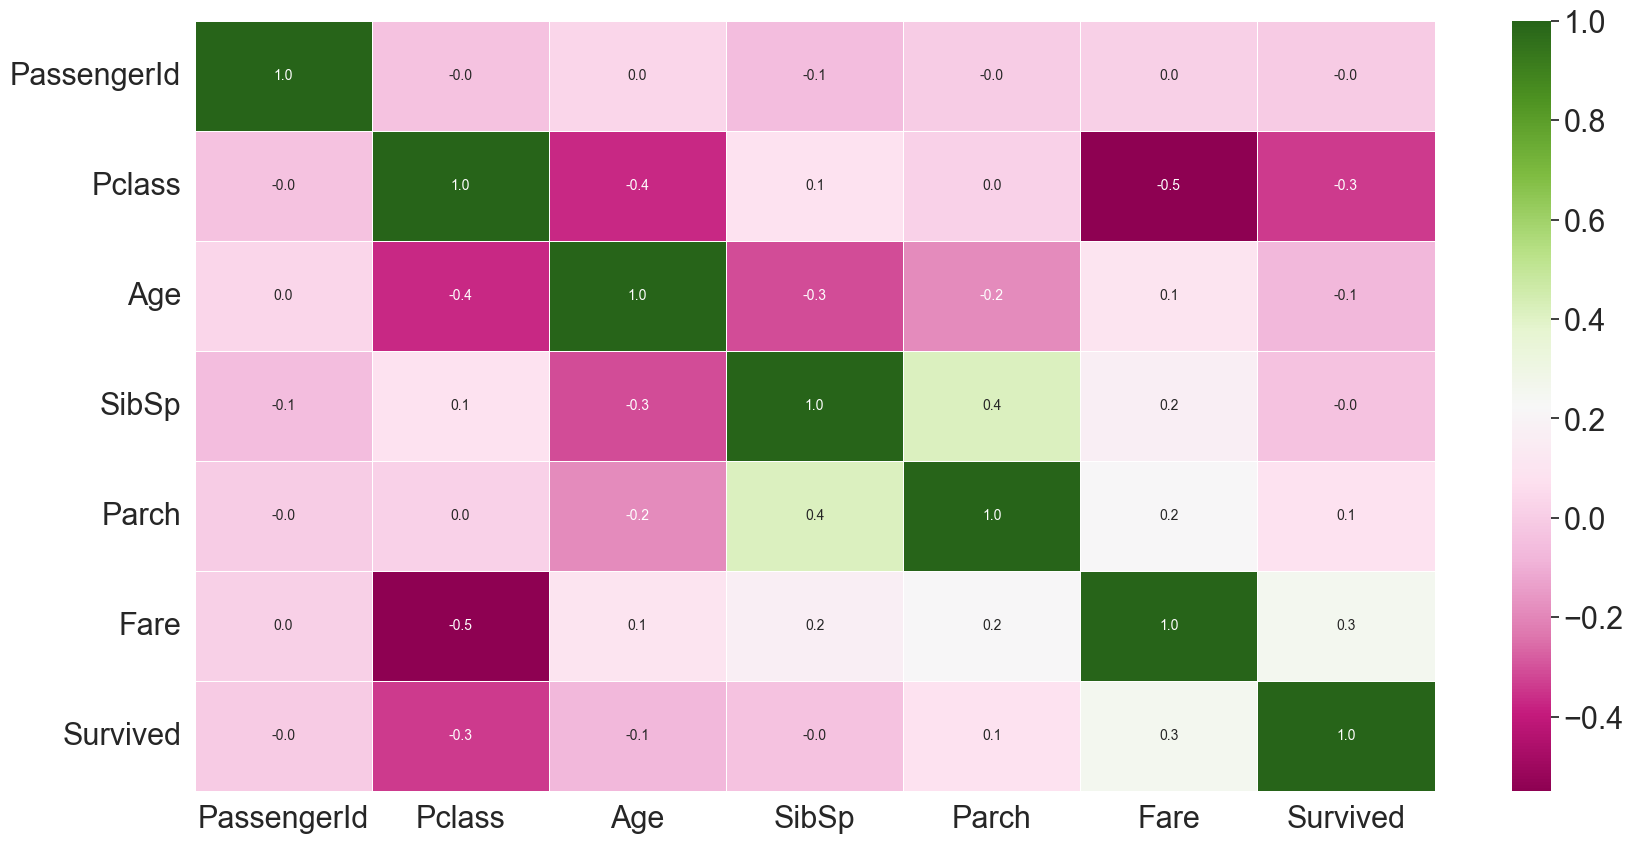

In [17]:
sns.set(font_scale=2)
plt.figure(figsize = (20,10))
ax = sns.heatmap(numerical_train.corr(), annot=True,annot_kws={"size": 10},fmt='.1f',cmap='PiYG', linewidths=.5)

# Categorical

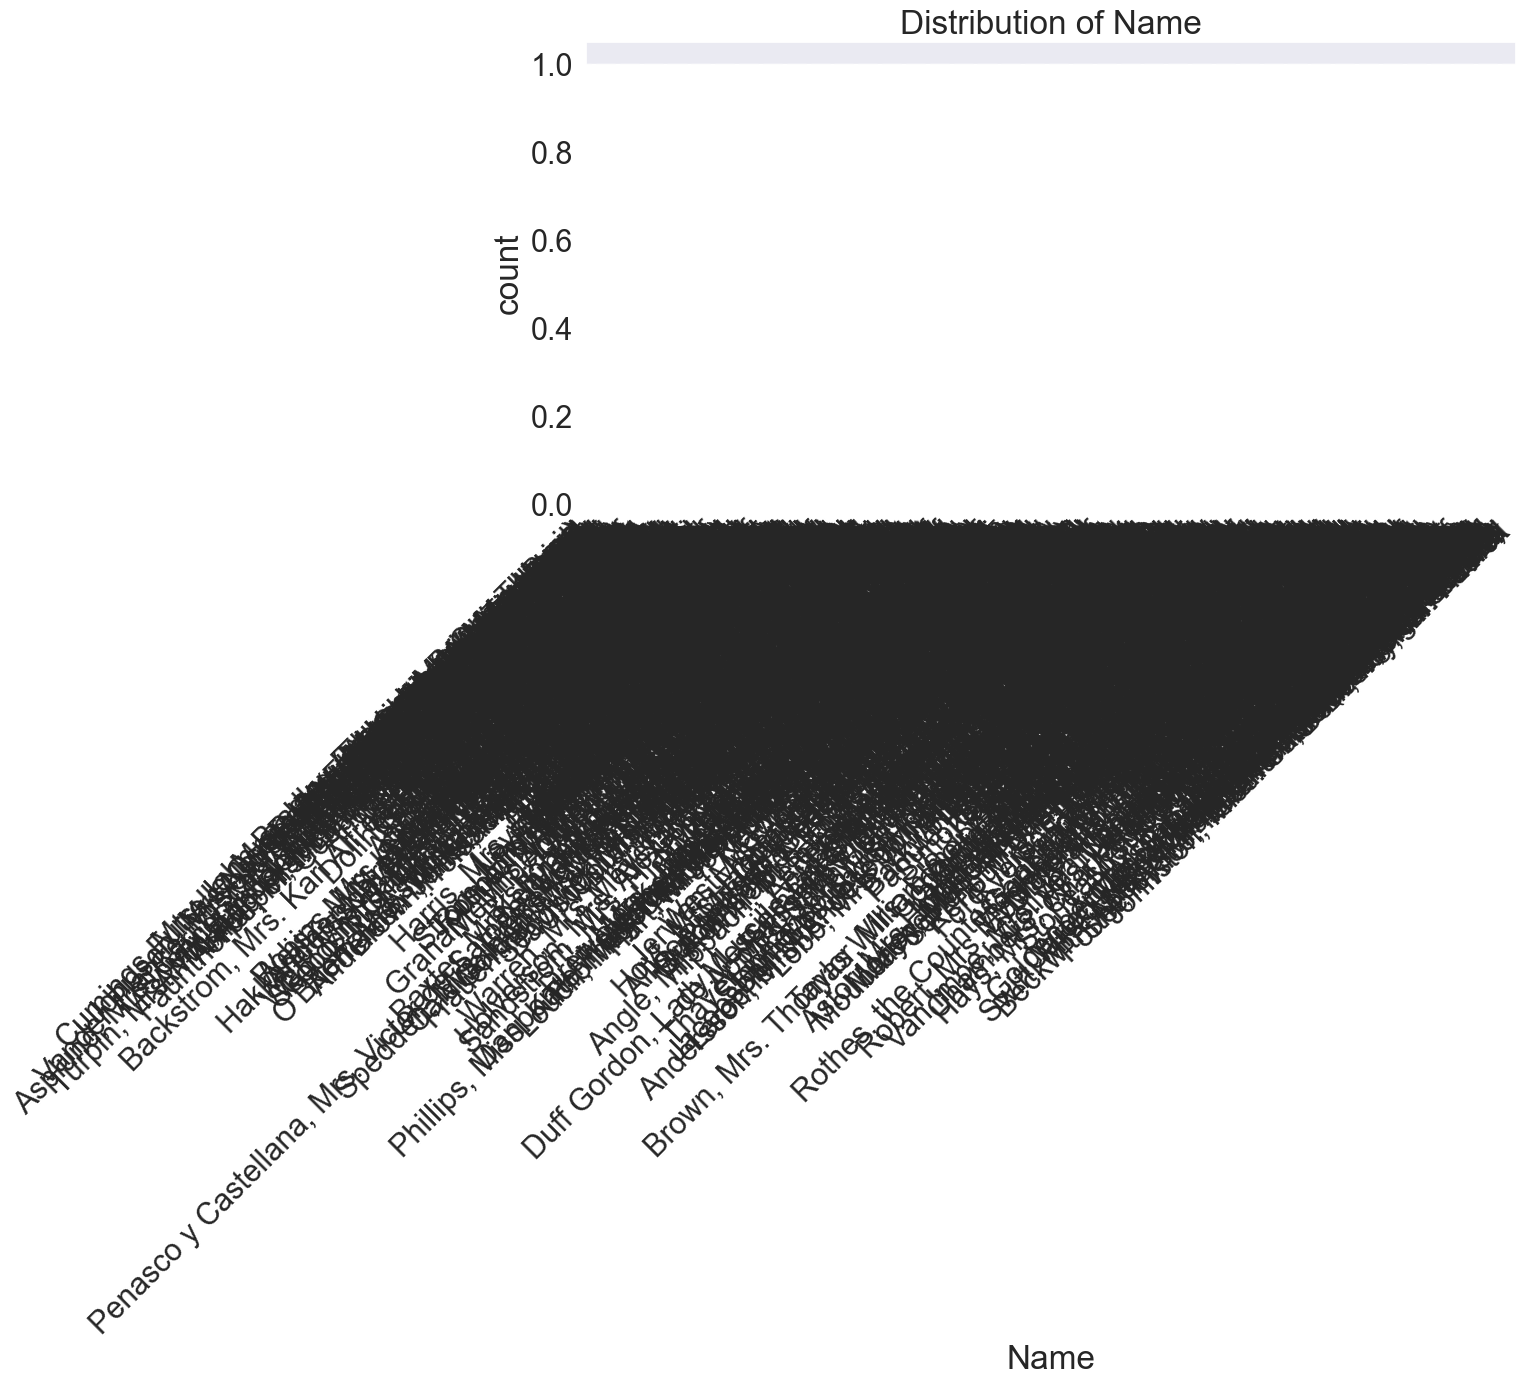

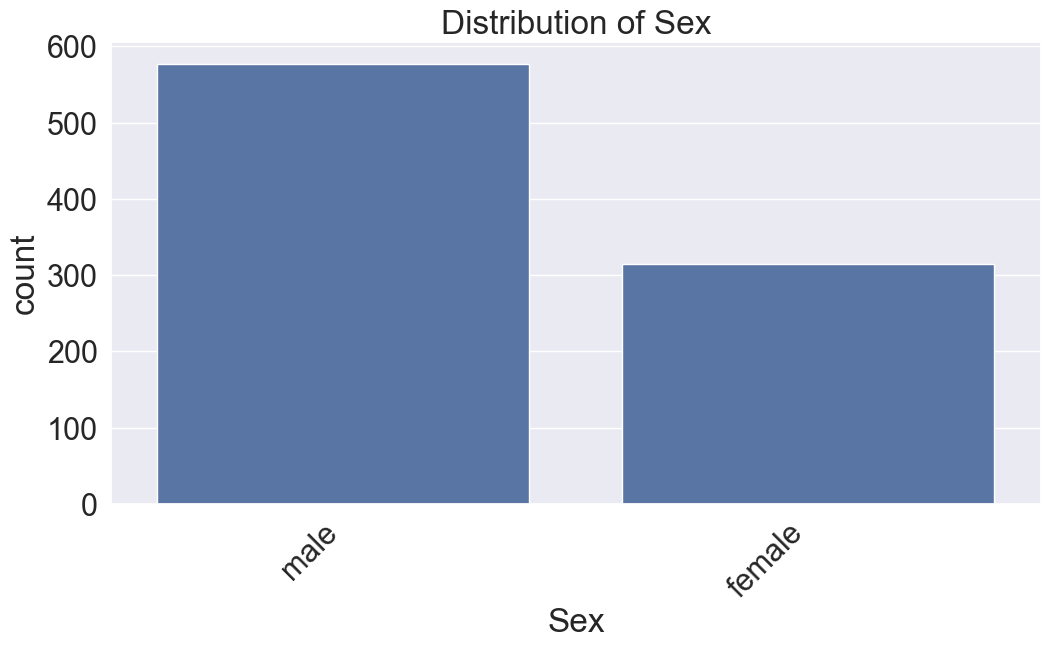

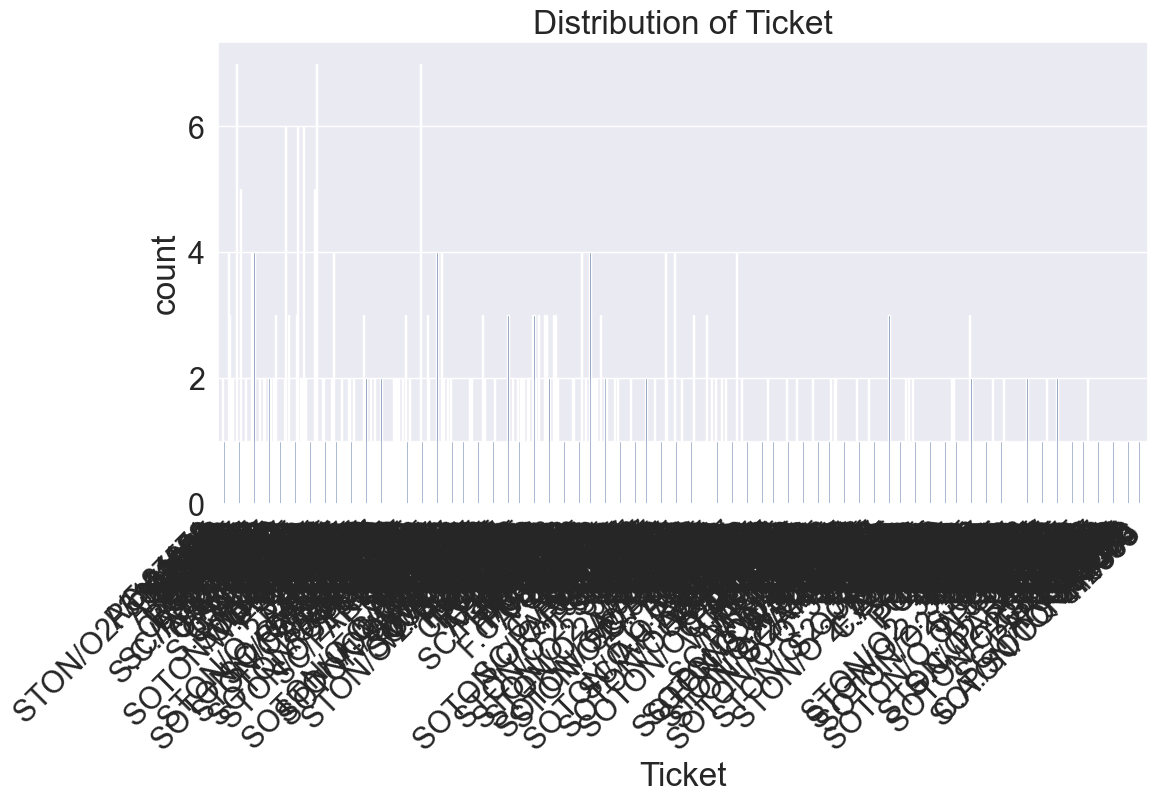

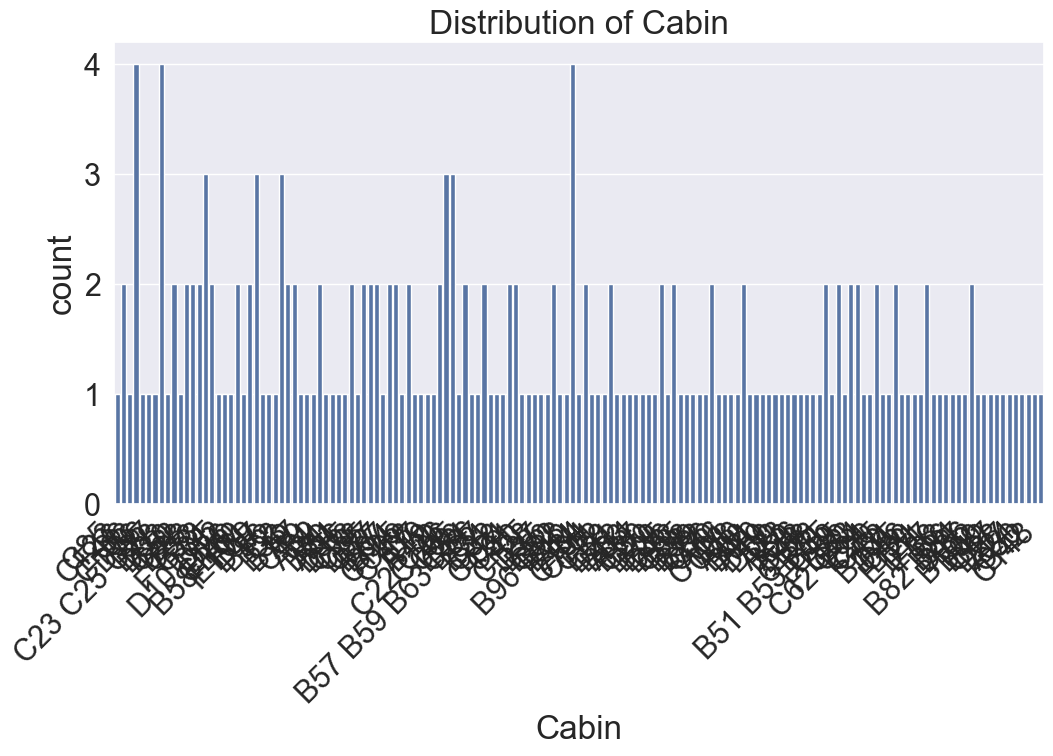

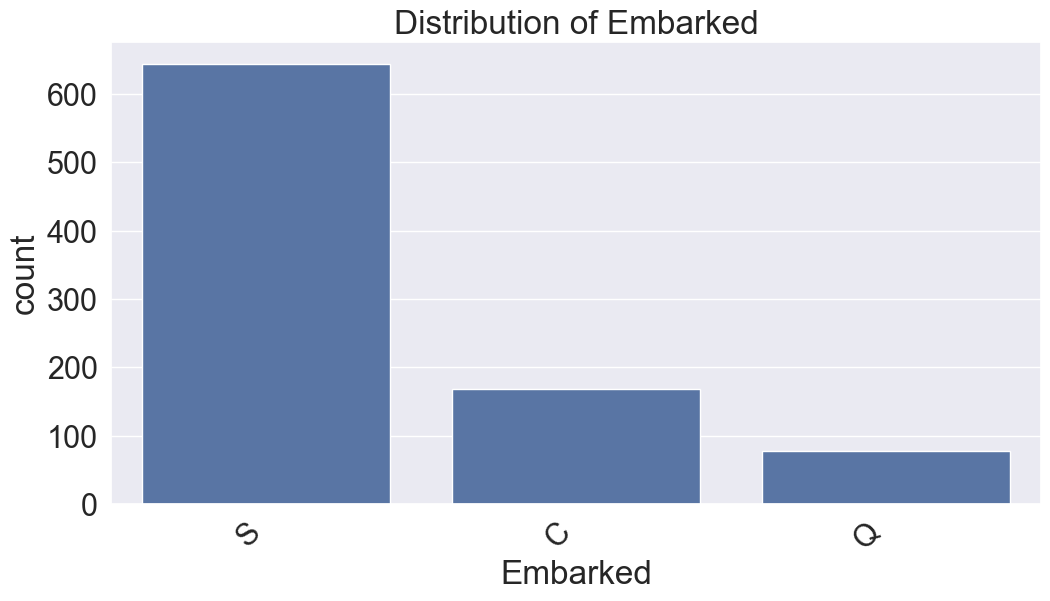

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming categorical_train is your DataFrame
for column in categorical_train.columns:
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.countplot(x=column, data=categorical_train)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if needed
    plt.show()

In [13]:
categorical_train.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')